In [50]:
from numpy.random import random 

def generate(n):
    probs = random(n)
    probs /= sum(probs)
    return {chr(65+i) : probs[i] for i in range(n)}

In [51]:
import heapq
from collections import namedtuple

class Node(namedtuple("Node", ["left", "right"])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")
    
class Leaf(namedtuple("Leaf", ["char"])):
    def walk(self, code, acc):
        code[self.char] = acc or "0"
    
def huffman_encode(data):
    h = []
    for ch, prob in data.items():
        h.append((prob, len(h), Leaf(ch)))
    
    heapq.heapify(h)
    
    count = len(h)
    while len(h) > 1:
        prob1, _count1, left = heapq.heappop(h)
        prob2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (prob1+prob2, count, Node(left, right)))
    [(_prob, _count, root)] = h
    code = {}
    root.walk(code, "")
    return code

In [54]:
import time

N = [1000,2000,4000,8000, 16000]
result_time = []
for n in N:
    mean_time = 0
    for i in range(20):
        data = generate(n)
        startTime = time.time()
        code = huffman_encode(data)
        endTime = time.time()
        mean_time += (endTime - startTime)

    result_time.append(mean_time/20)
    print("Время работы:", mean_time/20, "seconds")

Время работы: 0.003880512714385986 seconds
Время работы: 0.0096413254737854 seconds
Время работы: 0.020937299728393553 seconds
Время работы: 0.04137781858444214 seconds
Время работы: 0.09543548822402954 seconds


T( 2000 ) к T( 1000 )
theor 2.2006866637759877
practice 2.4845493839107156
T( 4000 ) к T( 2000 )
theor 2.1823854954722584
practice 2.171620467053178
T( 8000 ) к T( 4000 )
theor 2.1671432438042215
practice 1.9762729254111373
T( 16000 ) к T( 8000 )
theor 2.154252142106506
practice 2.3064407812912795


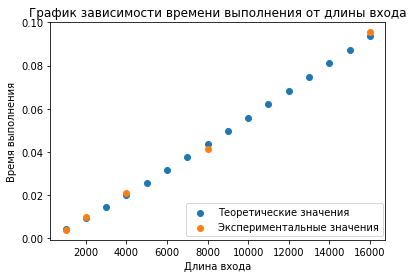

In [59]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.set_title('График зависимости времени выполнения от длины входа')
theor_x = list(range(1000, 17000, 1000))
theor_y = list()
for n in range(1000, 17000, 1000):
    theor_y.append(1/1650000 * n*np.log(n))
ax.scatter(theor_x, theor_y, label='Теоретические значения')
ax.scatter(N,result_time, label='Экспериментальные значения')
fig.legend(loc=(0.45, 0.15))
ax.set_xlabel('Длина входа')
ax.set_ylabel('Время выполнения')
for i in range(1, 5):
    print('T(',2**i*1000,') к T(', 2**(i-1)*1000,')')
    print('theor', theor_y[2**i-1]/theor_y[2**(i-1)-1])
    print('practice', result_time[i]/result_time[i-1])
    